In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

df = pd.read_csv('./london_weather.csv')
df.dropna(inplace= True)
df.reset_index(drop=True, inplace=True)

#get mean monthly temp
df['date'] = pd.to_datetime(df['date'],format='%Y%m%d')
df['month'] = pd.DatetimeIndex(df['date']).month
df['year'] = pd.DatetimeIndex(df['date']).year
df['month_year'] = pd.to_datetime(df['date']).dt.to_period('M')
df=df.groupby('month_year').mean()
df=df['mean_temp']
df.columns = ['y']
df=df.to_frame()


# # #df['date'].dt.to_period('M')

# df.sort_values(by='month_year', inplace = True)
# df.reset_index(drop=True, inplace=True)
# df=df[['mean_temp']]
# #df.columns = ['y']
# #df.set_index('ds', inplace= True)


# df = pd.read_csv('./london_weather.csv')
# df.dropna(inplace= True)
# df.reset_index(drop=True, inplace=True)
# df=df[["date","mean_temp"]]


# #get mean monthly temp
# df['date'] = pd.to_datetime(df['date'],format='%Y%m%d')
# df['month'] = pd.DatetimeIndex(df['date']).month
# df['year'] = pd.DatetimeIndex(df['date']).year
# df['month_year'] = pd.to_datetime(df['date']).dt.to_period('M')
# df=df.groupby('month_year').mean()


# df.sort_values(by='date', inplace = True)
# df.reset_index(drop=True, inplace=True)
# df.columns = ['ds','y']
# df.set_index('ds', inplace= True)


# im=pd.data_range('1979-01','2020-12',freq='MS').strftime("%Y-%m").tolist()

# #df.drop('Month',axis=1,inplace=True)
# #df['date'] = pd.to_datetime(df['date'],format='%Y%m%d')
# #df.columns = ['ds','y']
# #df=df.drop('ds', axis=1)

# #df.set_index('ds', inplace= True)

# # df['date'] = pd.to_datetime(df['date'],format='%Y%m%d')


# # df.sort_values(by='date', inplace = True)
# # df.reset_index(drop=True, inplace=True)

# # df.columns = ['ds','y']
# # df.set_index('ds', inplace= True)


df




C:\Users\CJyM2\AppData\Local\Temp\ipykernel_46432\702744431.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df=df.groupby('month_year').mean()


,mean_temp
month_year,
1979-01,0.527586
1979-02,2.028000
1979-03,5.587097
1979-04,8.743333
1979-05,11.490323
...,...
2020-08,20.393333
2020-09,16.616667
2020-10,11.933333


In [37]:
"""#find d

from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.mean_temp.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

#if p<0.05, stationary, no differencing required, 
# d=0
"""

"#find d\n\nfrom statsmodels.tsa.stattools import adfuller\nfrom numpy import log\nresult = adfuller(df.mean_temp.dropna())\nprint('ADF Statistic: %f' % result[0])\nprint('p-value: %f' % result[1])\n\n#if p<0.05, stationary, no differencing required, \n# d=0\n"

In [38]:
"""# find ACF
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.mean_temp); axes[0, 0].set_title('Original Series')
plot_acf(df.mean_temp, ax=axes[0, 1])
plt.xlim(0, 30)

# 1st Differencing
axes[1, 0].plot(df.mean_temp.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.mean_temp.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.mean_temp.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.mean_temp.diff().diff().dropna(), ax=axes[2, 1])

plt.show()"""


"# find ACF\nimport numpy as np, pandas as pd\nfrom statsmodels.graphics.tsaplots import plot_acf, plot_pacf\nimport matplotlib.pyplot as plt\nplt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})\n\n# Original Series\nfig, axes = plt.subplots(3, 2, sharex=True)\naxes[0, 0].plot(df.mean_temp); axes[0, 0].set_title('Original Series')\nplot_acf(df.mean_temp, ax=axes[0, 1])\nplt.xlim(0, 30)\n\n# 1st Differencing\naxes[1, 0].plot(df.mean_temp.diff()); axes[1, 0].set_title('1st Order Differencing')\nplot_acf(df.mean_temp.diff().dropna(), ax=axes[1, 1])\n\n# 2nd Differencing\naxes[2, 0].plot(df.mean_temp.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')\nplot_acf(df.mean_temp.diff().diff().dropna(), ax=axes[2, 1])\n\nplt.show()"

In [39]:
"""# find p
# PACF plot of Non-differenced series

import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(4, 2, sharex=True)
axes[0, 0].plot(df.mean_temp); axes[0, 0].set_title('Original Series')
plot_pacf(df.mean_temp.dropna(), ax=axes[0, 1])# dropna () removes the rows that contains NULL values
plt.xlim(0, 30)

# 1st Differencing
axes[1, 0].plot(df.mean_temp.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_pacf(df.mean_temp.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.mean_temp.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_pacf(df.mean_temp.diff().diff().dropna(), ax=axes[2, 1])

plt.show()"""


"# find p\n# PACF plot of Non-differenced series\n\nimport numpy as np, pandas as pd\nfrom statsmodels.graphics.tsaplots import plot_acf, plot_pacf\nimport matplotlib.pyplot as plt\nplt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})\n\n# Original Series\nfig, axes = plt.subplots(4, 2, sharex=True)\naxes[0, 0].plot(df.mean_temp); axes[0, 0].set_title('Original Series')\nplot_pacf(df.mean_temp.dropna(), ax=axes[0, 1])# dropna () removes the rows that contains NULL values\nplt.xlim(0, 30)\n\n# 1st Differencing\naxes[1, 0].plot(df.mean_temp.diff()); axes[1, 0].set_title('1st Order Differencing')\nplot_pacf(df.mean_temp.diff().dropna(), ax=axes[1, 1])\n\n# 2nd Differencing\naxes[2, 0].plot(df.mean_temp.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')\nplot_pacf(df.mean_temp.diff().diff().dropna(), ax=axes[2, 1])\n\nplt.show()"

In [40]:
# # find q
# import pandas as pd
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# import matplotlib.pyplot as plt
# plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

# fig, axes = plt.subplots(1, 2, sharex=True)
# axes[0].plot(df.y); axes[0].set_title('No Differencing')
# axes[1].set(ylim=(0,1.2))
# plot_acf(df.y.dropna(), ax=axes[1])
# plt.xlim(0, 40)
# plt.show()

# #simply assume q=2

# """import pandas as pd
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# import matplotlib.pyplot as plt
# plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

# PACFplot=df.reset_index(drop = True)

# fig, axes = plt.subplots(1, 2, sharex=True)
# axes[0].plot(PACFplot.y.diff()); axes[0].set_title('1st Differencing')
# axes[1].set(ylim=(0,1.2))
# plot_acf(PACFplot.y.diff().dropna(), ax=axes[1])
# plt.xlim(0, 40)
# plt.show()"""

# testing 2

In [5]:
# Split data into train / test sets
n=int(len(df)*0.2)
train = df.iloc[:len(df)-n]
test = df.iloc[len(df)-n:]

In [42]:
# Import the library
from pmdarima import auto_arima
  
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

  
# Fit auto_arima function to AirPassengers dataset
stepwise_fit = auto_arima(df['mean_temp'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
  
# To print the summary
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=2.73 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=2054.865, Time=0.04 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1907.077, Time=0.80 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=2.92 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=2053.466, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=2041.838, Time=0.11 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=1850.590, Time=1.30 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=5.02 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=2.47 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=1870.217, Time=11.97 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=1851.094, Time=1.56 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=1850.572, Time=1.99 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=1908.002, Time=0.93 sec
 ARIMA(1,0,1)(2,1,1)[12] intercept   : AIC=inf, Time=7.61 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  504
Model:             SARIMAX(1, 0, 1)x(2, 1, [], 12)   Log Likelihood                -920.050
Date:                             Mon, 03 Apr 2023   AIC                           1850.099
Time:                                     22:38:24   BIC                           1871.092
Sample:                                          0   HQIC                          1858.342
                                             - 504                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5160      0.163      3.168      0.002       0.197       0.835
ma.L1         -0.3194      0.179     -1.789      0.074      -0.669       0.030
ar.S.L12      -0.6689      0.042    -15.795      0.000      -0.752      -0.586
ar.S.L24      -0.3458      0.044     -7.907      0.000      -0.432      -0.260
sigma2         2.4325      0.158     15.423      0.000       2.123       2.742
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.17
Prob(Q):                              0.89   Prob(JB):                         0.92
Heteroskedasticity (H):               0.82   Skew:                            -0.04
Prob(H) (two-sided):                  0.20   Kurtosis:                         2.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [6]:
#build up ARIMA 

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# (1,0,1)(2,1,0,12) ARIMA Model
model = ARIMA(df['mean_temp'], 
                order = (1, 0, 1), 
                seasonal_order =(2, 1, 0, 12))
  
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                         mean_temp   No. Observations:                  504
Model:             ARIMA(1, 0, 1)x(2, 1, [], 12)   Log Likelihood                -920.050
Date:                           Mon, 03 Apr 2023   AIC                           1850.099
Time:                                   23:16:13   BIC                           1871.092
Sample:                               01-31-1979   HQIC                          1858.342
                                    - 12-31-2020                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5160      0.163      3.168      0.002       0.197       0.835
ma.L1         -0.3194      0.179     -1.789      0.074      -0.669       0.030
ar.S.L12      -0.6689      0.042    -15.795      0.000      -0.752      -0.586
ar.S.L24      -0.3458      0.044     -7.907      0.000      -0.432      -0.260
sigma2         2.4325      0.158     15.423      0.000       2.123       2.742
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.17
Prob(Q):                              0.89   Prob(JB):                         0.92
Heteroskedasticity (H):               0.82   Skew:                            -0.04
Prob(H) (two-sided):                  0.20   Kurtosis:                         2.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# prediction 1 year

<Axes: xlabel='month_year'>

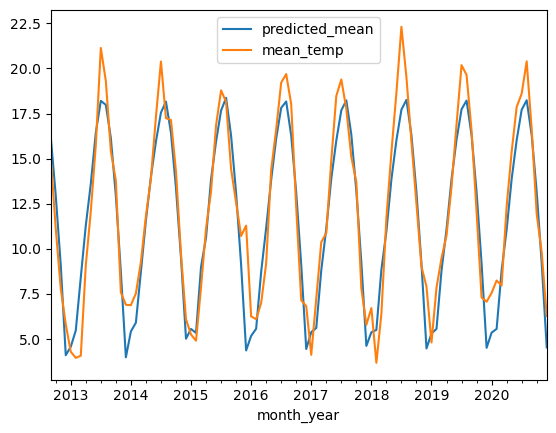

In [41]:
#Predictions of ARIMA Model against the test set
start = len(train)
#end = len(train) + len(test) - 1 
end = len(df)+60

# Predictions for one-year against the test set
predictions = result.predict(start, end, dynamic=True
                             )#.rename("Predictions")
#predictions.index=test.index

# plot predictions and actual values
predictions.iloc[:len(test)].plot(legend = True)
test['mean_temp'].plot(legend = True)




In [42]:
#Evaluate the model using MSE and RMSE
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
  
# Calculate root mean squared error
RMSE=rmse(test["mean_temp"], predictions.iloc[:len(test)])
  
# Calculate mean squared error
ERROR=mean_squared_error(test["mean_temp"], predictions.iloc[:len(test)])

In [43]:
ERROR

2.977115752154936

In [44]:
RMSE

1.725432047967968

# forecasting 5 years

In [45]:
predictions

2012-09    16.240105
2012-10    12.967592
2012-11     9.111200
2012-12     4.102026
2013-01     4.569879
             ...    
2025-09    16.304315
2025-10    13.154536
2025-11     9.182558
2025-12     4.517144
2026-01     5.343232
Freq: M, Name: predicted_mean, Length: 161, dtype: float64

<Axes: xlabel='month_year'>

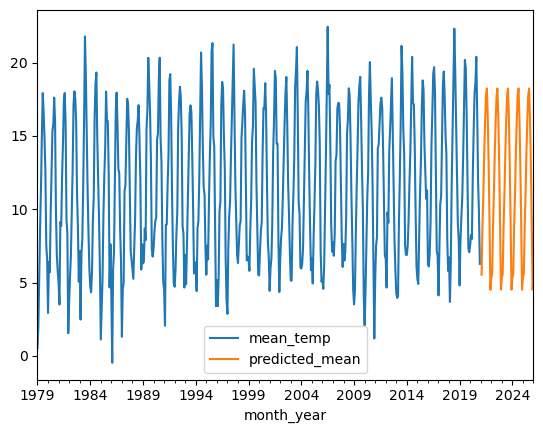

In [48]:
df['mean_temp'].plot(legend = True)
predictions.iloc[-60:].plot(legend = True)

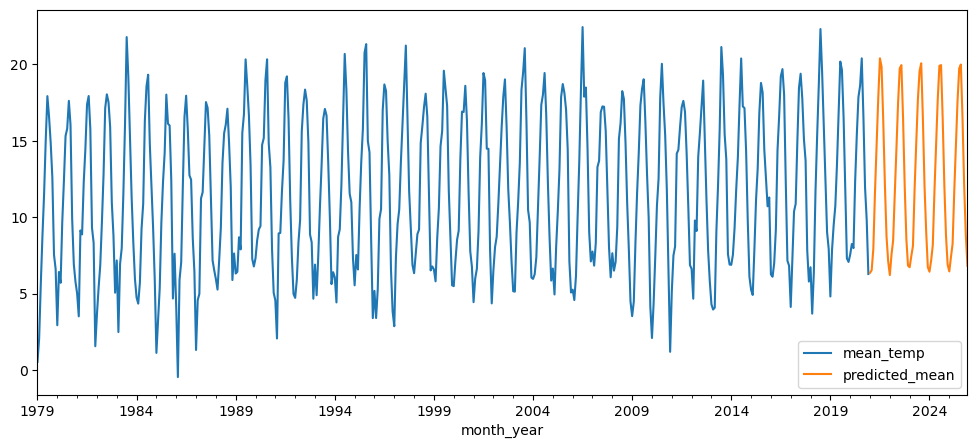

In [48]:
# #Forecast using ARIMA Model
# #forecasting 5 years


# # Train the model on the full dataset
# model = ARIMA(df['mean_temp'], 
#                 order = (1, 0, 1), 
#                 seasonal_order =(2, 1, 0, 12))
# result = model.fit()

# # Forecast for the next 5 years
# forecast = result.predict(start = len(df), 
#                           end = (len(df)-1) + 60, #next 5 years
#                           typ = 'levels')#.rename('Forecast')

# # Plot the forecast values
# df['mean_temp'].plot(figsize = (12, 5), legend = True)
# forecast.plot(legend = True)

# forecast.to_csv('forecast_single.csv', header=True, index=False, encoding='utf-8')